# Lecture 23: Dates and time series analysis, APIs


[Fix rendering:](https://computing-in-context.afeld.me/notebooks.html#jupyter-book)


In [1]:
import plotly.io as pio

pio.renderers.default = "notebook_connected+plotly_mimetype"

## Dates and time series analysis

From [Wikipedia](https://en.wikipedia.org/wiki/Time_series):

> A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.


What are time series you've seen / worked with?


## Importing necessary packages


In [2]:
import pandas as pd
import plotly.express as px

<frozen importlib._bootstrap>:491: RuntimeWarning:

The global interpreter lock (GIL) has been enabled to load module 'pandas._libs.pandas_parser', which has not declared that it can run safely without the GIL. To override this behavior and keep the GIL disabled (at your own risk), run with PYTHON_GIL=0 or -Xgil=0.



## Data preparation

Load 311 data.


In [3]:
requests_311 = pd.read_csv("https://storage.googleapis.com/python-public-policy2/data/311_requests_2018-19_sample_clean.csv.zip")

/var/folders/kr/nx0m1j811kz5vy8c87ffchzr0000gn/T/ipykernel_93083/99667367.py:1: DtypeWarning:

Columns (8,20,31,34) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
requests_311[["Created Date", "Closed Date"]]

,Created Date,Closed Date
0,08/01/2018 12:05:13 AM,08/01/2018 12:05:13 AM
1,08/01/2018 12:06:05 AM,08/01/2018 12:06:05 AM
2,08/01/2018 12:06:16 AM,08/03/2018 02:03:55 PM
3,08/01/2018 12:06:29 AM,08/01/2018 02:54:24 AM
4,08/01/2018 12:06:51 AM,08/01/2018 04:54:26 AM
...,...,...
499953,08/24/2019 01:46:09 AM,NaN
499954,08/24/2019 01:49:49 AM,NaN
499955,08/24/2019 01:56:35 AM,NaN
499956,08/24/2019 01:56:40 AM,NaN


The dates are strings:


In [5]:
requests_311.dtypes

Unique Key                          int64
Created Date                       object
Closed Date                        object
Agency                             object
Agency Name                        object
Complaint Type                     object
Descriptor                         object
Location Type                      object
Incident Zip                       object
Incident Address                   object
Street Name                        object
Cross Street 1                     object
Cross Street 2                     object
Intersection Street 1              object
Intersection Street 2              object
Address Type                       object
City                               object
Landmark                           object
Facility Type                      object
Status                             object
Due Date                           object
Resolution Description             object
Resolution Action Updated Date     object
Community Board                   

## Convert columns to timestamps using [pandas' `to_datetime()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#converting-to-timestamps)


In [6]:
requests_311["Created Date"] = pd.to_datetime(requests_311["Created Date"], format="%m/%d/%Y %I:%M:%S %p")
requests_311["Closed Date"] = pd.to_datetime(requests_311["Closed Date"], format="%m/%d/%Y %I:%M:%S %p")

In [7]:
requests_311[["Created Date", "Closed Date"]]

,Created Date,Closed Date
0,2018-08-01 00:05:13,2018-08-01 00:05:13
1,2018-08-01 00:06:05,2018-08-01 00:06:05
2,2018-08-01 00:06:16,2018-08-03 14:03:55
3,2018-08-01 00:06:29,2018-08-01 02:54:24
4,2018-08-01 00:06:51,2018-08-01 04:54:26
...,...,...
499953,2019-08-24 01:46:09,NaT
499954,2019-08-24 01:49:49,NaT
499955,2019-08-24 01:56:35,NaT
499956,2019-08-24 01:56:40,NaT


[More about the `format` string.](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) If you don't provide one, it will take much longer to convert.


Check data types and confirm they are now datetime:


In [8]:
requests_311.dtypes

Unique Key                                 int64
Created Date                      datetime64[ns]
Closed Date                       datetime64[ns]
Agency                                    object
Agency Name                               object
Complaint Type                            object
Descriptor                                object
Location Type                             object
Incident Zip                              object
Incident Address                          object
Street Name                               object
Cross Street 1                            object
Cross Street 2                            object
Intersection Street 1                     object
Intersection Street 2                     object
Address Type                              object
City                                      object
Landmark                                  object
Facility Type                             object
Status                                    object
Due Date            

## Noise complaints per day


In [9]:
noise = requests_311[requests_311["Complaint Type"] == "Noise - Residential"]
noise_per_day = noise.resample("D", on="Created Date").size().reset_index(name="count_requests")

noise_per_day

,Created Date,count_requests
0,2018-08-01,50
1,2018-08-02,49
2,2018-08-03,65
3,2018-08-04,162
4,2018-08-05,191
...,...,...
384,2019-08-20,60
385,2019-08-21,46
386,2019-08-22,62
387,2019-08-23,109


### [Resampling](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/09_timeseries.html#resample-a-time-series-to-another-frequency)

Once you have a column with datetime objects, pandas can manipulate them directly. From [the User Guide](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#resampling):

> `resample()` is a time-based `groupby`


```python
.resample('D', on='Created Date')
```

The `'D'` is the [period alias](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#period-aliases), i.e. the desired frequency.


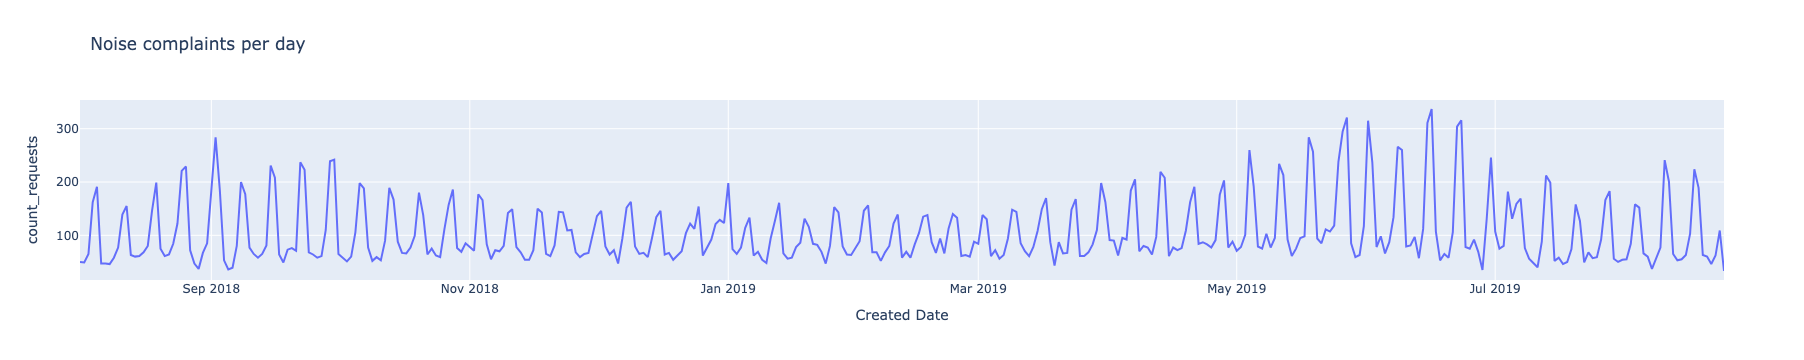

In [10]:
fig = px.line(
    noise_per_day,
    x="Created Date",
    y="count_requests",
    title="Noise complaints per day",
)
fig.show()

Let's try weekly:


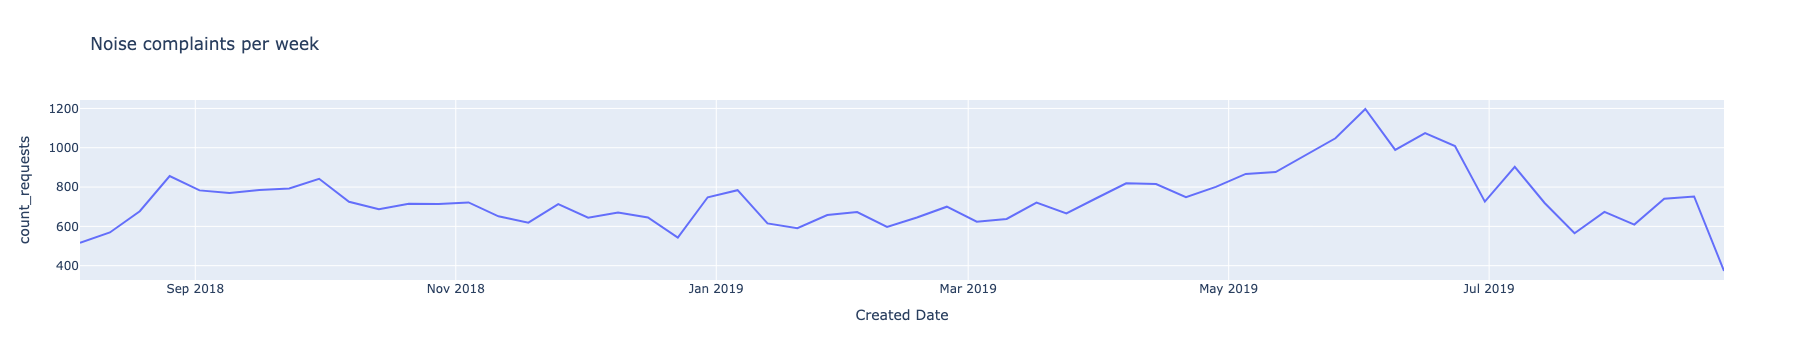

In [11]:
noise_per_week = noise.resample("W", on="Created Date").size().reset_index(name="count_requests")

fig = px.line(
    noise_per_week,
    x="Created Date",
    y="count_requests",
    title="Noise complaints per week",
)
fig.show()

## What's the average duration?


In [12]:
# calculate the amount of time that passed between Created Date and Closed Date

requests_311["resolution_duration"] = requests_311["Closed Date"] - requests_311["Created Date"]

# print head to check results

requests_311[["Closed Date", "Created Date", "resolution_duration"]].head()

,Closed Date,Created Date,resolution_duration
0,2018-08-01 00:05:13,2018-08-01 00:05:13,0 days 00:00:00
1,2018-08-01 00:06:05,2018-08-01 00:06:05,0 days 00:00:00
2,2018-08-03 14:03:55,2018-08-01 00:06:16,2 days 13:57:39
3,2018-08-01 02:54:24,2018-08-01 00:06:29,0 days 02:47:55
4,2018-08-01 04:54:26,2018-08-01 00:06:51,0 days 04:47:35


In [13]:
requests_311.dtypes

Unique Key                                  int64
Created Date                       datetime64[ns]
Closed Date                        datetime64[ns]
Agency                                     object
Agency Name                                object
Complaint Type                             object
Descriptor                                 object
Location Type                              object
Incident Zip                               object
Incident Address                           object
Street Name                                object
Cross Street 1                             object
Cross Street 2                             object
Intersection Street 1                      object
Intersection Street 2                      object
Address Type                               object
City                                       object
Landmark                                   object
Facility Type                              object
Status                                     object


In [14]:
requests_311["resolution_duration"].mean()

Timedelta('7 days 22:46:26.962985676')

In [15]:
requests_311["resolution_duration"].median()

Timedelta('1 days 05:19:58')

## [Filtering timestamps](https://www.geeksforgeeks.org/select-pandas-dataframe-rows-between-two-dates/)

Noise complaints over New Year's.


In [16]:
requests_311

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,resolution_duration
0,39885889,2018-08-01 00:05:13,2018-08-01 00:05:13,DOT,Department of Transportation,Street Condition,Pothole,NaN,11235,3143 SHORE PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,40.585156,-73.959119,"(40.585155533520144, -73.95911915841708)",0 days 00:00:00
1,39886470,2018-08-01 00:06:05,2018-08-01 00:06:05,DOT,Department of Transportation,Street Condition,Pothole,NaN,11235,3153 SHORE PARKWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,40.585218,-73.958608,"(40.58521848090658, -73.95860788382927)",0 days 00:00:00
2,39893543,2018-08-01 00:06:16,2018-08-03 14:03:55,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,11221,729 LAFAYETTE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.690733,-73.943964,"(40.69073285353906, -73.943963521266)",2 days 13:57:39
3,39886233,2018-08-01 00:06:29,2018-08-01 02:54:24,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11693,82-01 BEACH CHANNEL DRIVE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.589931,-73.808896,"(40.58993080750793, -73.80889570815852)",0 days 02:47:55
4,39880309,2018-08-01 00:06:51,2018-08-01 04:54:26,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216,64 HERKIMER STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.679716,-73.951234,"(40.67971590505359, -73.95123396494363)",0 days 04:47:35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499953,43622302,2019-08-24 01:46:09,NaT,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10009.0,431 EAST 9 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.727536,-73.983295,"(40.72753608835362, -73.98329522742081)",NaT
499954,43619709,2019-08-24 01:49:49,NaT,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10304.0,191 BROAD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.624157,-74.081006,"(40.62415703282506, -74.08100614362155)",NaT
499955,43623124,2019-08-24 01:56:35,NaT,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10031.0,534 WEST 153 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.830718,-73.945006,"(40.83071800761314, -73.94500557250639)",NaT
499956,43625595,2019-08-24 01:56:40,NaT,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10452.0,EAST 170 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.839882,-73.916783,"(40.839882158779105, -73.91678321635897)",NaT


In [17]:
after_dec_31 = requests_311["Created Date"] >= pd.Timestamp(2018, 12, 31)
before_jan_2 = requests_311["Created Date"] < pd.Timestamp(2019, 1, 2)
residential_only = requests_311["Complaint Type"] == "Noise - Residential"

condition = after_dec_31 & before_jan_2 & residential_only
new_years_noise = requests_311[condition]

display_columns = ["Created Date", "Complaint Type"]
new_years_noise[display_columns]

,Created Date,Complaint Type
201471,2018-12-31 00:03:37,Noise - Residential
201473,2018-12-31 00:05:12,Noise - Residential
201475,2018-12-31 00:07:00,Noise - Residential
201478,2018-12-31 00:11:18,Noise - Residential
201481,2018-12-31 00:19:44,Noise - Residential
...,...,...
203413,2019-01-01 22:59:22,Noise - Residential
203415,2019-01-01 23:03:03,Noise - Residential
203416,2019-01-01 23:04:27,Noise - Residential
203420,2019-01-01 23:10:46,Noise - Residential


You can also [filter dates using strings](https://saturncloud.io/blog/how-to-filter-pandas-dataframe-by-time/), but using the [`Timestamp`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Timestamp.html) class is safer.


## APIs

- They are very powerful
- Can be used from any programming language


## APIs, conceptually


How does booking a flight work?


![Diagram showing how online payments work: Expedia talks to Delta, Delta talks to Stripe, Stripe talks to Visa, and Visa talks to Chase](img/apis_conceptually/payments.png)


![Diagram showing how notifications flow through systems](img/apis_conceptually/notifications.png)


![Diagram showing relationship between human languages, programming languages, and APIs](img/apis_conceptually/languages.png)


interactions between systems ↔️


## Ways to get data

| Method       | How it happens                                      | Pros                                                               | Cons                                                                                                                                                |
| ------------ | :-------------------------------------------------- | :----------------------------------------------------------------- | :-------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Bulk**     | Download, someone hands you a flash drive, etc.     | Fast, one-time transfer                                            | Can be large; data gets out of date easily                                                                                                          |
| **APIs**     | If organization makes one available                 | Usually allows some filtering; can always pull latest-and-greatest | Requires network connection for every call; higher barrier to entry (reading documentation, access); subject to availability and performance of API |
| **Scraping** | Data only available through a web site, PDF, or doc | You can turn anything into data                                    | Tedious; fragile                                                                                                                                    |


### Data is only available if it's available


_Please pray to the Demo Gods that these all work and there's no profanity_


## API calls in the wild

1. Go to [Candidates page on fec.gov](https://www.fec.gov/data/candidates/?has_raised_funds=true&is_active_candidate=true).
1. Right click and `Inspect`.
   - [More info about opening Developer Tools in various browsers.](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_are_browser_developer_tools#how_to_open_the_devtools_in_your_browser)
1. Go to the `Network` tab and reload.
1. Filter to `XHR`.
1. Click the API call.


We only see this because the tables on [fec.gov](https://fec.gov) are [rendered client-side](https://www.solutelabs.com/blog/client-side-vs-server-side-rendering-what-to-choose-when) using their JSON API. That won't be the case for all tables on all sites.


### Parts of a URL

![URL structure](https://developer.mozilla.org/en-US/docs/Learn_web_development/Howto/Web_mechanics/What_is_a_URL/mdn-url-all.png)

[source](https://developer.mozilla.org/en-US/docs/Learn/Common_questions/What_is_a_URL#basics_anatomy_of_a_url)


For APIs:

- Often split into "base URL" + "endpoint"
- Endpoints are like function names: they represent the information you are retrieving or thing you are trying to do
- Parameters are like function arguments:
  - They allow options to be specified
  - Some are required, some are optional
  - They will differ from one endpoint/function to another
- Anchors won't be used


### API documentation

[FEC API](https://api.open.fec.gov/developers/)


Go to [Population By Borough dataset](https://data.cityofnewyork.us/City-Government/New-York-City-Population-by-Borough-1950-2040/xywu-7bv9/about_data) and get the API endpoint.


## API calls from Python

Usually one of two ways:

- A software development kit (SDK) like [sodapy](https://pypi.org/project/sodapy/)
  - Abstracts the details away
  - Not available for all APIs
  - May have limitations
- [The `requests` package](https://requests.readthedocs.io/)
  - Nothing to do with 311 requests


In [18]:
import requests

response = requests.get("https://data.cityofnewyork.us/resource/xywu-7bv9.json")
data = response.json()

data

[{'age_group': 'Total Population',
  'borough': 'NYC Total',
  '_1950': '7891957',
  '_1950_boro_share_of_nyc_total': '100.00',
  '_1960': '7781984',
  '_1960_boro_share_of_nyc_total': '100.00',
  '_1970': '7894862',
  '_1970_boro_share_of_nyc_total': '100.00',
  '_1980': '7071639',
  '_1980_boro_share_of_nyc_total': '100.00',
  '_1990': '7322564',
  '_1990_boro_share_of_nyc_total': '100.00',
  '_2000': '8008278',
  '_2000_boro_share_of_nyc_total': '100.00',
  '_2010': '8242624',
  '_2010_boro_share_of_nyc_total': '100.00',
  '_2020': '8550971',
  '_2020_boro_share_of_nyc_total': '100.00',
  '_2030': '8821027',
  '_2030_boro_share_of_nyc_total': '100.00',
  '_2040': '9025145',
  '_2040_boro_share_of_nyc_total': '100.00'},
 {'age_group': 'Total Population',
  'borough': '   Bronx',
  '_1950': '1451277',
  '_1950_boro_share_of_nyc_total': '18.39',
  '_1960': '1424815',
  '_1960_boro_share_of_nyc_total': '18.31',
  '_1970': '1471701',
  '_1970_boro_share_of_nyc_total': '18.64',
  '_1980':

### Reading into a DataFrame


In [19]:
pd.DataFrame(data)

,age_group,borough,_1950,_1950_boro_share_of_nyc_total,_1960,_1960_boro_share_of_nyc_total,_1970,_1970_boro_share_of_nyc_total,_1980,_1980_boro_share_of_nyc_total,...,_2000,_2000_boro_share_of_nyc_total,_2010,_2010_boro_share_of_nyc_total,_2020,_2020_boro_share_of_nyc_total,_2030,_2030_boro_share_of_nyc_total,_2040,_2040_boro_share_of_nyc_total
0,Total Population,NYC Total,7891957,100.00,7781984,100.00,7894862,100.00,7071639,100.00,...,8008278,100.00,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00
1,Total Population,Bronx,1451277,18.39,1424815,18.31,1471701,18.64,1168972,16.53,...,1332650,16.64,1385108,16.80,1446788,16.92,1518998,17.22,1579245,17.50
2,Total Population,Brooklyn,2738175,34.70,2627319,33.76,2602012,32.96,2230936,31.55,...,2465326,30.78,2552911,30.97,2648452,30.97,2754009,31.22,2840525,31.47
3,Total Population,Manhattan,1960101,24.84,1698281,21.82,1539233,19.50,1428285,20.20,...,1537195,19.20,1585873,19.24,1638281,19.16,1676720,19.01,1691617,18.74
4,Total Population,Queens,1550849,19.65,1809578,23.25,1986473,25.16,1891325,26.75,...,2229379,27.84,2250002,27.30,2330295,27.25,2373551,26.91,2412649,26.73
5,Total Population,Staten Island,191555,2.43,221991,2.85,295443,3.74,352121,4.98,...,443728,5.54,468730,5.69,487155,5.70,497749,5.64,501109,5.55


### Most open data sites have APIs

Often built on platforms that provide them, e.g.

- [NYC Open Data Portal](https://opendata.cityofnewyork.us/) built on ~~Socrata~~ [Tyler Data & Insights](https://www.tylertech.com/solutions/transformative-technology/data-insights)
  - Their API is still called the Socrata Open Data API (SODA)
- [data.gov built on CKAN](https://www.data.gov/developers/apis)


### Pagination

- Most APIs limit the number of results returned.
- [SODA defaults to 1,000.](https://dev.socrata.com/docs/queries/limit.html)
- You'll work with this [in Lab 12](https://computing-in-context.afeld.me/lab_12.html#pagination).


## Things are going to differ by API

- Endpoints
- Supported parameters
- Response structure
  - [`json_normalize()`](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#normalization) can help
- Quality of documentation
- Helpfulness of errors
- Size/helpfulness of community

Gotta read and experiment.
